In [8]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_drug_data_to_load)
clinical_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
combined_df = pd.merge(clinical_df, mouse_df, how='inner', on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [9]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
grouped_df = combined_df.groupby(["Drug", "Timepoint"])
avgTumorVolume = grouped_df.mean()["Tumor Volume (mm3)"]
# Convert to DataFrame
avg_tumor_response_df = pd.DataFrame(avgTumorVolume)
# Preview DataFrame
avg_tumor_response_df = avg_tumor_response_df.reset_index()
avg_tumor_response_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [10]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
seTumorVolume = grouped_df.sem()["Tumor Volume (mm3)"]
# Convert to DataFrame
se_tumor_response_df = pd.DataFrame(seTumorVolume)
# Preview DataFrame
se_tumor_response_df = se_tumor_response_df.reset_index()
se_tumor_response_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [11]:
# Minor Data Munging to Re-Format the Data Frames
avg_tumor_munged_df = avg_tumor_response_df.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
# Preview that Reformatting worked
avg_tumor_munged_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


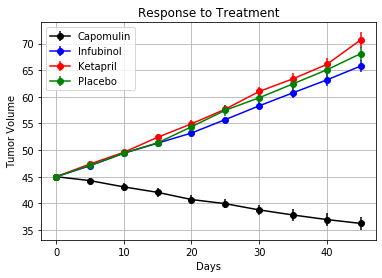

In [25]:
fig, ax = plt.subplots()
x_axis = avg_tumor_munged_df.index.values
# Plot 
y_axis = avg_tumor_munged_df.Capomulin.values
standard_errors = se_tumor_response_df[se_tumor_response_df.Drug == 'Capomulin']['Tumor Volume (mm3)'].values
ax.errorbar(x_axis, y_axis, standard_errors, fmt="o", label='Capomulin', color='black', linestyle='solid')

y_axis = avg_tumor_munged_df.Infubinol.values
standard_errors = se_tumor_response_df[se_tumor_response_df.Drug == 'Infubinol']['Tumor Volume (mm3)'].values
ax.errorbar(x_axis, y_axis, standard_errors, fmt="o", label='Infubinol', color='blue', linestyle='solid')

y_axis = avg_tumor_munged_df.Ketapril.values
standard_errors = se_tumor_response_df[se_tumor_response_df.Drug == 'Ketapril']['Tumor Volume (mm3)'].values
ax.errorbar(x_axis, y_axis, standard_errors, fmt="o", label='Ketapril', color='red', linestyle='solid')

y_axis = avg_tumor_munged_df.Placebo.values
standard_errors = se_tumor_response_df[se_tumor_response_df.Drug == 'Placebo']['Tumor Volume (mm3)'].values
ax.errorbar(x_axis, y_axis, standard_errors, fmt="o", label='Placebo', color='green', linestyle='solid')

plt.title("Response to Treatment")
plt.xlabel("Days")
plt.ylabel("Tumor Volume")
plt.legend(loc='topleft')
plt.grid()

# Save the Figure
plt.savefig("data/Tumor_Response.png")

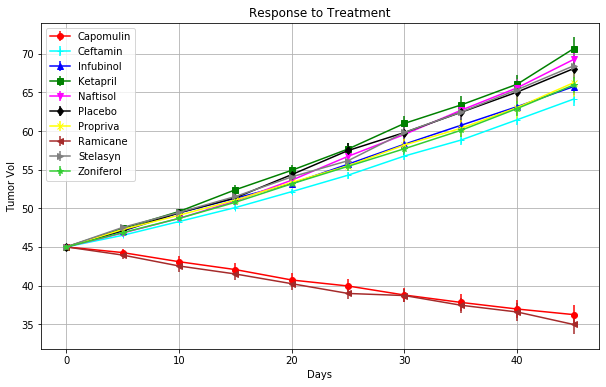

In [26]:
# Generate the Plot
fig, ax = plt.subplots(figsize=(10,6))
x_axis = avg_tumor_munged_df.index.values

# Loops through drugs to plot
i = 0
for drug in avg_tumor_munged_df.columns:
    y_axis = avg_tumor_munged_df[drug].values
    standard_errors = se_tumor_response_df[se_tumor_response_df.Drug == drug]['Tumor Volume (mm3)'].values
    ax.errorbar(x_axis, y_axis, standard_errors, label=drug, linestyle='solid', marker=markers[i], color=colors[i])
    i += 1

# Labels
plt.title("Response to Treatment")
plt.xlabel("Days")
plt.ylabel("Tumor Vol")
plt.legend(loc='best')
plt.grid()

# Save the Figure
plt.savefig("data/Tumor_ResponseFULL.png")

In [28]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
avgMetaResponse = grouped_df.mean()['Metastatic Sites']
# Convert to DataFrame
avg_meta_response_df = pd.DataFrame(avgMetaResponse)
# Preview DataFrame
avg_meta_response_df = avg_meta_response_df.reset_index()
avg_meta_response_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [29]:
seMetaSites = grouped_df.sem()['Metastatic Sites']
# Convert to DataFrame
se_meta_response_df = pd.DataFrame(seMetaSites)
# Preview DataFrame
se_meta_response_df = se_meta_response_df.reset_index()
se_meta_response_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [30]:
# Minor Data Munging to Re-Format the Data Frames
avg_meta_munged_df = avg_meta_response_df.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')
# Preview that Reformatting worked
avg_meta_munged_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


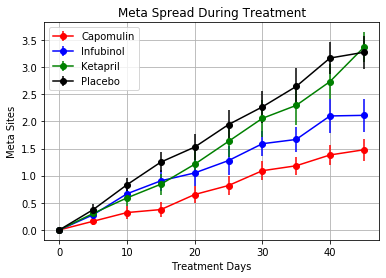

In [35]:
fig, ax = plt.subplots()
x_axis = avg_meta_munged_df.index.values
# Plot Capomulin
y_axis = avg_meta_munged_df.Capomulin.values
standard_errors = se_meta_response_df[se_meta_response_df.Drug == 'Capomulin']['Metastatic Sites'].values
ax.errorbar(x_axis, y_axis, standard_errors, fmt="o", label='Capomulin', color='red', linestyle='solid')
# Plot Infubinol
y_axis = avg_meta_munged_df.Infubinol.values
standard_errors = se_meta_response_df[se_meta_response_df.Drug == 'Infubinol']['Metastatic Sites'].values
ax.errorbar(x_axis, y_axis, standard_errors, fmt="o", label='Infubinol', color='blue', linestyle='solid')
# Plot Ketapril
y_axis = avg_meta_munged_df.Ketapril.values
standard_errors = se_meta_response_df[se_meta_response_df.Drug == 'Ketapril']['Metastatic Sites'].values
ax.errorbar(x_axis, y_axis, standard_errors, fmt="o", label='Ketapril', color='green', linestyle='solid')
# Plot Placebo
y_axis = avg_meta_munged_df.Placebo.values
standard_errors = se_meta_response_df[se_meta_response_df.Drug == 'Placebo']['Metastatic Sites'].values
ax.errorbar(x_axis, y_axis, standard_errors, fmt="o", label='Placebo', color='black', linestyle='solid')

# Labels
plt.title("Meta Spread During Treatment")
plt.xlabel("Treatment Days")
plt.ylabel("Meta Sites")
plt.legend(loc='topleft')
plt.grid()

plt.savefig("data/Meta_Spread.png")

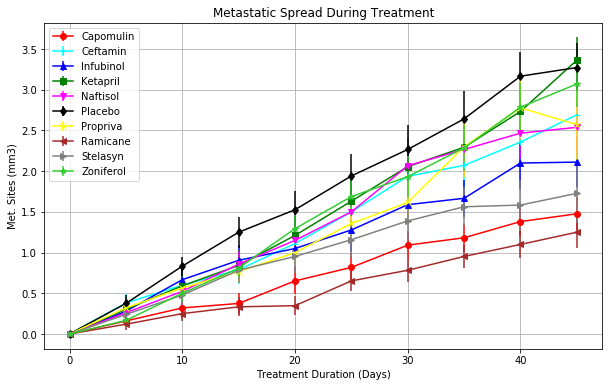

In [37]:
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots(figsize=(10,6))
x_axis = avg_meta_munged_df.index.values

# Looop through drugs to plot
i = 0
for drug in avg_meta_munged_df.columns:
    y_axis = avg_meta_munged_df[drug].values
    standard_errors = se_meta_response_df[se_meta_response_df.Drug == drug]['Metastatic Sites'].values
    ax.errorbar(x_axis, y_axis, standard_errors, label=drug, linestyle='solid', marker=markers[i], color=colors[i])
    i += 1

# Labels
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites (mm3)")
plt.legend(loc='topleft')
plt.grid()

# Save the Figure
plt.savefig("data/Metastatic_SpreadFULL.png")

![Tumor Response to Treatment](../Images/treatment.png)

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [38]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survivalRates = grouped_df.count()['Mouse ID']
# Convert to DataFrame
survival_rates_df = pd.DataFrame(survivalRates)
# Preview DataFrame
survival_rates_df = survivalRates.reset_index()
survival_rates_df.head()
# Convert to DataFrame

# Preview DataFrame


,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [39]:
# Minor Data Munging to Re-Format the Data Frames
survival_munged_df = survival_rates_df.pivot(index='Timepoint', columns='Drug', values='Mouse ID')
# Preview the Data Frame
survival_munged_df.head()
# Preview the Data Frame


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


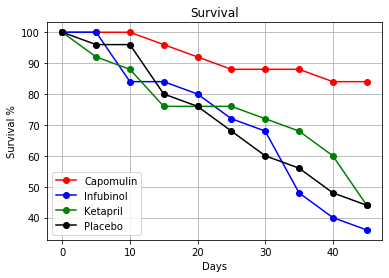

In [40]:
x_axis = survival_munged_df.index.values
# Plot Capomulin
countInitMice = survival_munged_df.Capomulin.values[0]
y_axis = survival_munged_df.Capomulin.values / countInitMice * 100
plt.plot(x_axis, y_axis, marker='o', label='Capomulin', color='red')
# Plot Infubinol
countInitMice = survival_munged_df.Infubinol.values[0]
y_axis = survival_munged_df.Infubinol.values / countInitMice * 100
plt.plot(x_axis, y_axis, marker='o', label='Infubinol', color='blue')
# Plot Ketapril
countInitMice = survival_munged_df.Ketapril.values[0]
y_axis = survival_munged_df.Ketapril.values / countInitMice * 100
plt.plot(x_axis, y_axis, marker='o', label='Ketapril', color='green')
# Plot Placebo
countInitMice = survival_munged_df.Placebo.values[0]
y_axis = survival_munged_df.Placebo.values / countInitMice * 100
plt.plot(x_axis, y_axis, marker='o', label='Placebo', color='black')

# Labels
plt.title("Survival")
plt.xlabel("Days")
plt.ylabel("Survival %")
plt.legend(loc='bottomleft')
plt.grid()
# Save the Figure
plt.savefig("data/Survival.png")
# Show the Figure
plt.show()

In [41]:

# Calculate the percent changes for each drug
avg_tumor_df = avg_tumor_response_df.drop(['Timepoint'], axis=1)
drug_grouped_df = avg_tumor_df.groupby(['Drug'])
# % = last value - first value / first value * 100
percentChanges = (drug_grouped_df['Tumor Volume (mm3)'].last() - drug_grouped_df['Tumor Volume (mm3)'].first()) / drug_grouped_df['Tumor Volume (mm3)'].first() * 100
# Display the data to confirm
percentChanges

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
Name: Tumor Volume (mm3), dtype: float64

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

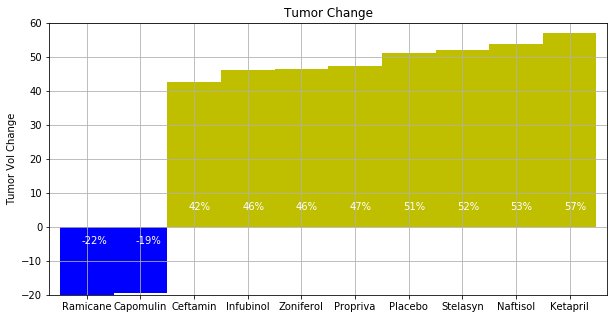

In [51]:
# Store all Percent Changes
percentChanges = percentChanges.sort_values(ascending=True)

# Splice the data 
failingDrug_s = percentChanges[percentChanges < 0].sort_values(ascending=True)
passingDrug_s = percentChanges[percentChanges >= 0].sort_values(ascending=True)

# Use functions to label the percentages of changes
plt.figure(figsize=(10,5))
# Call functions to implement the function calls
neg_ax = plt.bar(failingDrug_s.index.values, failingDrug_s.values, color='b', width=1)
pos_ax = plt.bar(passingDrug_s.index.values, passingDrug_s.values, color='y', width=1)

# Add labels
plt.title("Tumor Change")
plt.ylabel("Tumor Vol Change")
plt.xlim(-0.7,len(percentChanges)-0.3)
plt.ylim(-20,60)
plt.grid()

# For each bar: Place a label % for negative
neg_rects = neg_ax.patches
for rect in neg_rects:
    # Get X and Y placement of label from rect.
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    percentY = str(int(y_value)) + '%'
    plt.text(x_value-0.1, -5, percentY, color='w')
    
    # For each bar: Place a label % for positive
pos_rects = pos_ax.patches
for rect in pos_rects:
    # Get X and Y placement of label from rect.
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    percentY = str(int(y_value)) + '%'
    plt.text(x_value-0.1, 5, percentY, color='w')

# Save the Figure
plt.savefig("data/Tumor_Change.png")

# Show the Figure
fig.show()


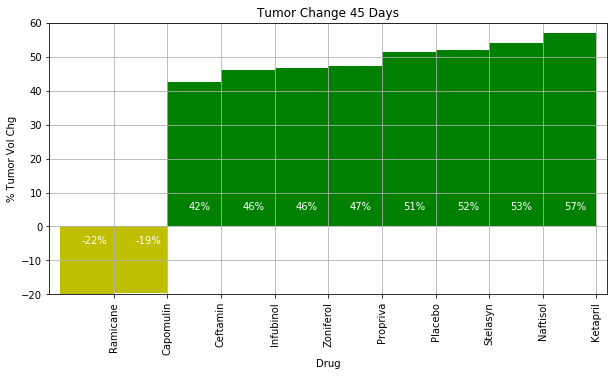

In [54]:
# Store all Relevant Percent Changes into a Tuple
percentChanges = percentChanges.sort_values()

# Splice the data between passing and failing drugs
failingDrug_s = percentChanges[percentChanges < 0].sort_values()
passingDrug_s = percentChanges.copy()
passingDrug_s.loc[passingDrug_s.values < 0] = 0
passingDrug_s = passingDrug_s.sort_values()

# Orient widths. tick marks, etc. 
x_axis = np.arange(len(percentChanges))
tick_locations = [value+0.5 for value in x_axis]

plt.figure(figsize=(10,5))
# Use functions to label the percentages of changes
ax = failingDrug_s.plot(kind='bar', color='y', width=1)
passingDrug_s.plot(kind='bar', color='g', width=1, ax=ax)
plt.xticks(tick_locations, percentChanges.index)

# Add labels
plt.title("Tumor Change 45 Days")
plt.ylabel("% Tumor Vol Chg")
plt.xlim(-0.7,len(percentChanges)-0.3)
plt.ylim(-20,60)
plt.grid()

# For each bar: Place a label % for negative & positive
rects = ax.patches
for rect in rects:
    # Get X and Y placement of label from rect.
    y_value = rect.get_height()
    if y_value < 0.0:
        x_value = rect.get_x() + rect.get_width() / 2
        percentY = str(int(y_value)) + '%'
        plt.text(x_value-0.1, -5, percentY, color='w')
    elif y_value > 0.0:
        x_value = rect.get_x() + rect.get_width() / 2
        percentY = str(int(y_value)) + '%'
        plt.text(x_value-0.1, 5, percentY, color='w')
        
# Save the Figure
plt.savefig("data/Tumor_Change_Over_45 - 2.png")

![Metastatic Spread During Treatment](../Images/change.png)